In [1]:
try:
    import platipy
except:
    !pip install platipy
import platipy
import SimpleITK as sitk
from platipy.dicom.download.tcia import (get_collections, get_modalities_in_collection, get_patients_in_collection, fetch_data)
from platipy.imaging import ImageVisualiser
from platipy.imaging.label.utils import get_com

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 25.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.


In [2]:
collections = get_collections()

In [3]:
collection = 'LCTSC'
modalities = get_modalities_in_collection(collection)
print(f"Modalities available: {modalities}")

Modalities available: ['RTSTRUCT', 'CT']


In [4]:
patients = get_patients_in_collection(collection)

In [5]:
patient_id = patients[0]
data = fetch_data(collection, patient_ids=[patient_id], modalities=["CT", "RTSTRUCT"], nifti=True)

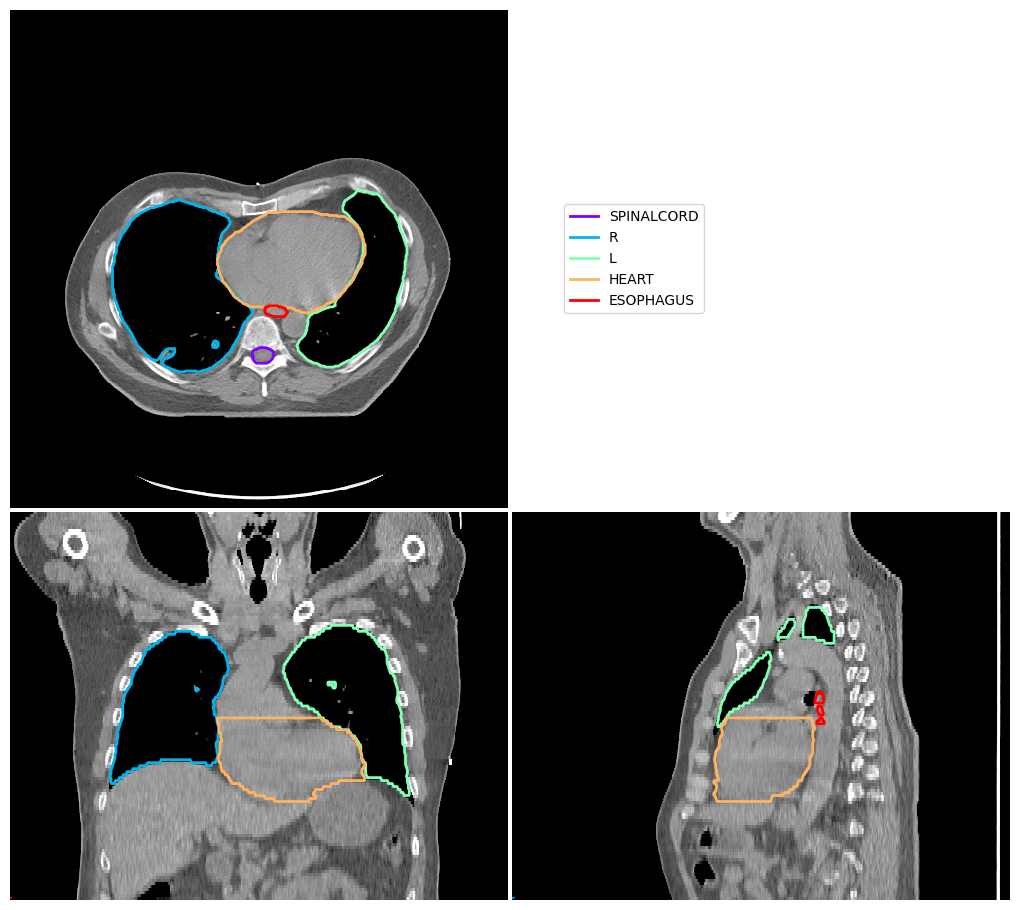

In [6]:
ct_path = [p for p in data[patient_id]["NIFTI"]["IMAGES"] if p.name.endswith("CT_0.nii.gz")][0]
ct = sitk.ReadImage(str(ct_path))
structures = {s.name.split(".")[0].split("_")[-1]: sitk.ReadImage(str(s)) for s in data[patient_id]["NIFTI"]["STRUCTURES"]}
img_vis = ImageVisualiser(ct, cut=get_com(structures["HEART"]), figure_size_in=10)
img_vis.add_contour(structures)
fig = img_vis.show()
